Link:


https://colab.research.google.com/drive/17qI9bqlxr8K6Z4h92oJqQfnsGSXpKjIq?usp=sharing


Assignment 1


1.   Mirat Gajera - 1001829052

2.   Naveena Mullapudi - 1001821645

3.   Aparna Bhat - 1001255079





In [7]:
!pip install torchvision==0.2.1


In [8]:
!pip install pillow==6.2.1

In [3]:
#download CIFAR10 dataset from pytorch
import torch, torchvision
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True,transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)



Files already downloaded and verified
Files already downloaded and verified


**TASK 1**

Reference links:
1. https://www.kaggle.com/sainiviv/fully-connected-neural-network-using-numpy

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc

In [5]:
""" Pre-processing the dataset """
# get X input from trainset
X_train = trainset.train_data
print(X_train.shape)
# flatten (50000,32,32,3) size of X into (3072,50000) size of matrix
# normalize each pixel value to between 0 and 1
X_train = X_train.reshape(X_train.shape[0],-1).T / 255
print(X_train.shape)
# did the same thing on testset: got X input and flatten it
X_test = testset.test_data
print(X_test.shape)
X_test = X_test.reshape(X_test.shape[0],-1).T / 255
print(X_test.shape)
# get label y from trainset
y_train = trainset.train_labels
print(y_train)
# reshape y from list to numpy array
y_train = np.reshape(np.asarray(y_train),(50000,))
print(y_train.shape)
# did the same thing on testset: got y label and reshape it
y_test = testset.test_labels
y_test = np.reshape(np.asarray(y_test),(10000,))
print(y_test.shape)

# function takes X input and y labels and ratio to split validation set
def split(X, y, val_ratio):
  val_number = int(val_ratio * X.shape[1]) 
  random_indice = np.random.permutation(X.shape[1])
  return X[:, random_indice[val_number:]],y[random_indice[val_number:]], X[:, random_indice[:val_number]], y[[random_indice[:val_number]]]
# split validation set from training set
X_train, y_train, X_val, y_val = split(X_train, y_train, val_ratio = 0.1)


(50000, 32, 32, 3)
(3072, 50000)
(10000, 32, 32, 3)
(3072, 10000)
[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9, 4, 5, 6, 4, 2, 1, 1, 2, 1, 5, 9, 9, 0, 8, 4, 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


In [6]:
def relu(Z):
        """
        Implement RELU function.

        Arguments:
        Z -- any shape of linear layer output

        Returns:
        A -- Post-activation parameter, of the same shape as Z
        cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
        """
        A = np.maximum(0,Z)
        assert(A.shape == Z.shape)
        cache = Z 
        return A, cache

In [7]:
class NeuralNetwork():
    
    def __init__(self, layer_dims):
        """
        Arguments:
        layer_dims -- A list contains the dimensions of each layer in CNN.
    
        Attributes generated:
        parameters -- a dict contains parameters "W1", "b1", ..., "WL", "bL"of each corresponding layer
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
        num_layers -- the length of layer_dims list
        """
     
        np.random.seed(1)
        self.num_layers = len(layer_dims)
        self.layer_dims = layer_dims
        self.parameters = {}
        L = len(self.layer_dims)
        for l in range(1, L):
            self.parameters['W'+ str(l)] = np.random.randn(layer_dims[l], layer_dims[l - 1]) / np.sqrt(layer_dims[l - 1])
            self.parameters['b'+ str(l)] = np.zeros([layer_dims[l], 1])
        self.X_val = None
        self.y_val = None

        

    def affineForward(self, A, W, b):
        """
         Implement the linear portion of CNN's forward propagation.

          Arguments:
          A -- activation from previous layer 
          W -- weights matrix
          b -- bias vector

          Returns:
          Z -- the input of the activation function
          cache -- a dict stores "A", "W" and "b" during forward propagation
        """
  
        
        np.seterr(all='raise')  

        Z = np.dot(W, A) + b              
        cache = (A, W, b)

        return Z, cache

    

    def activationForward(self, A_prev, W, b, activation="relu"):
        """
         Implement the linear to activation portion of CNN's forward propagation

          Arguments:
          Z -- output from linear portion of forward propagation
          activation(type) -- "relu" in this case

          Returns:
          A -- the ouput of relu activation
          cache -- a dict stores "A", "W" and "b" during forward propagation
        """

        activation = "relu"
        Z, linear_cache = self.affineForward(A_prev, W, b)
        A, activation_cache = relu(Z)

        cache = (linear_cache, activation_cache)

        return A, cache
            

    def forwardPropagation(self, X):
        """
        Implement the forward propagation 

        Arguments:
        X -- input from input layer as the starting point of forward propagation
  
        Returns:
        A -- the output of the activation function for each layer
        caches -- a list stores parameters (cache) for each layer during forward propagation
        """
        caches = []
        
        Len = len(self.parameters) // 2 
        A = X
        for l in range(1, Len):
            AL = A
            A, cache = self.activationForward(AL, self.parameters['W' + str(l)], self.parameters['b' + str(l)], activation = "relu")
            caches.append(cache)
          
        A, cache = self.activationForward(A, self.parameters['W' + str(Len)], self.parameters['b' + str(Len)], activation = "softmax")      #%%%%%
        caches.append(cache)

        return A, caches
      
      
    def softmax(self,AL):
        """
        Implement the softmax function 

        Arguments:
        AL -- output of linear portion of the output layer (last layer)
  
        Returns:
        p -- softmax probability
        """
        m = AL.shape[1]
        p = np.exp(AL - np.max(AL, axis=0, keepdims=True))
        p /= np.sum(p, axis=0, keepdims=True)
        return p
      
      
    def costFunction(self, AL, y):
        """
        Implement the cross entrophy loss

        Arguments:
        AL -- output of linear portion of the output layer (last layer)
        y -- the labels of data

        Returns:
        cost -- the cross entropy loss value of each iteration of forward propagation
        """
        a = AL.shape[1]
        b = self.softmax(AL)
        cost = -np.sum(np.log(b[y, np.arange(a)])) / a
        return cost
      
      
    def derivative_cost(self, AL, y): 
        """
        Implement the first step of back propagation: the derivative of cost function over AL

        Arguments:
        AL -- output of linear portion of the output layer (last layer)
        y -- the labels of data

        Returns:
        dAL -- the derivative of cost function over AL
        """
        a = AL.shape[1]
        b = self.softmax(AL)
        dAL = b.copy()
        dAL[y, np.arange(a)] -= 1
        dAL /= a
        return dAL


    def affineBackward(self, dA_prev, cache):
        """
        Implement the linear portion of backward propagation of one layer (layer l)

        Arguments:
        dAL -- derivative of the cost with respect to the activation output (of current layer l)
        cache -- releases A, W, b, Z values stored from the tuple during forward propagation of layer l

        Returns:
        dA -- Gradient of the cost over activation output from previous layer (layer l-1)
        dW -- Gradient of the cost over W for the current layer(layerl)
        db -- Gradient of the cost over b for the current layer(layer1)
        """
        np.seterr(all='raise')
        A_prev, W, b = cache
        a = A_prev.shape[1]
        dW = (1./a)*np.dot(dA_prev, A_prev.T)
        db = (1./a)*np.sum(dA_prev, keepdims=True, axis = 1)             
        dA = np.dot(W.T, dA_prev)                                   

        return dA, dW, db
    
    def activationBackward(self, dA, cache, activation="relu"):
        """
        Implement the derivative of cost function over relu activation input Z

        Arguments:
        dA -- the gradient of cost function over relu activation ouput A
        cache -- a tuple stores A,W,b,Z for each layer, cache[3] is Z
        activation(type) -- 'relu'
  
        Returns:
        relu_backward -- the derivative of cost function over Z
        """
        linear_cache, activation_cache = cache
        relu_backward = self.derivative_relu(dA, activation_cache)
        dA_prev, dW, db = self.affineBackward(relu_backward, linear_cache)

        return dA_prev, dW, db

        
    def derivative_relu(self, dA, cache):
        """
        Implement the derivative calculation of relu activation during backpropagation

        Arguments:
        dA -- the gradient of cost function over relu activation ouput A
        cache -- a tuple stores A,W,b,Z for each layer, cache[3] is Z
  
        Returns:
        dZ -- the derivative of cost function over Z
        """
        np.seterr(all='raise')
        Z = cache
        dZ = np.array(dA, copy=True) 
        dZ[Z <= 0] = 0

        assert (dZ.shape == Z.shape)

        return dZ

    def backPropagation(self, dAL, y, caches):
        """
        Implement backpropagation for each layer

        Arguments:
        dAL -- the gradient of cost function over the activation output of last layer: starting point for backpropagation
        y -- the labels of data
        caches -- a list stores tuple of A,W,b,Z for each layer
  
        Returns:
        grads -- a dict stores dWl and dbl for each layer l
        """
        grads = {}
        Len = len(caches) 
      
        cache_present = caches[Len-1]
        grads["dA" + str(Len)], grads["dW" + str(Len)], grads["db" + str(Len)] = self.activationBackward(dAL, cache_present, activation = "softmax")

        for l in reversed(range(Len-1)):
            cache_present = caches[l]
            dA_prev_temp, dW_temp, db_temp = self.activationBackward(grads["dA" + str(l + 2)],  cache_present, activation = "relu")
            grads["dA" + str(l + 1)] = dA_prev_temp
            grads["dW" + str(l + 1)] = dW_temp
            grads["db" + str(l + 1)] = db_temp

        return grads


    def updateParameters(self, grads, alpha):
        """
        Use gradient descent to implement parameters update

        Arguments:
        grads -- a dict stores all parameters gradients for each layer
        alpha -- learning rate

        Returns:
        self.parameters -- a dict stores updated parameters for W and b of each layer 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
        """
        Len = len(self.parameters) // 2

        
        for l in range(Len):
          self.parameters["W" + str(l+1)] = self.parameters["W" + str(l+1)] - alpha * grads["dW" + str(l + 1)]
          self.parameters["b" + str(l+1)] = self.parameters["b" + str(l+1)] - alpha * grads["db" + str(l + 1)]

        return self.parameters      
        
    def normalized_X(self,X):
        """
        Standardize the input data by substract mean and divided by variance
        
        Arguments:
        X -- input data
        
        Return:
        norm_X -- standardized data
        """
      
        standardize = {}
        standardize['mean'] = np.mean(X, axis = 1, keepdims = True)
        standardize['var'] = np.var(X, axis = 1, keepdims = True)
        norm_X = (X - standardize['mean']) / np.sqrt(standardize['var'])
        return norm_X

            
    def train(self, X, y, iters, alpha, batch_size, print_every):
        """
        It takes advantage of every function in this class to implement training and validation using CNN.
        
        Arguments:
        X -- input data
        y -- labels of data
        iters -- number of iterations to run
        alpha -- learning rate
        batch_size -- number of samples to assign to minibatch
        print_every -- number of iterations to print
        
        Return:
        Numbewr of iterations, train loss, train_acc, and valid_acc in every 100 iterations
        
        """
     
        X = self.normalized_X(X)
        for i in range(0, iters):
            X_batch, y_batch = self.get_batch(X, y, batch_size)
            AL, cache = self.forwardPropagation(X_batch)
            loss = self.costFunction(AL, y_batch)
            dAL = self.derivative_cost(AL, y_batch)
            grads = self.backPropagation(dAL, y_batch, cache)
            self.updateParameters(grads, alpha)
            if i % print_every == 0:
                train_acc = self.score(self.predict(X), y)
                val_acc = self.score(self.predict(self.X_val), self.y_val)
                print('iter={:5}, loss={:.4f}, train_acc={:.4f}, validation_acc={:.4f}'.format(i, loss, train_acc, val_acc))
                
    def predict(self, X):
        """
        It predicts the label given . input x
        Argument:
        X -- input of data
        Return:
        y_pred -- predicted label
        """
        X = self.normalized_X(X)
        AL, _ = self.forwardPropagation(X)
        y_pred = np.argmax(AL, axis = 0)
        return y_pred
      
      
    def score(self, y_pred, y_true):
        """
        It calculates the percentage of correct predicted labels over true labels
        
        Argument:
        y_pred-- predicted labels
        y_true -- true labels
        
        REturn: percentage of correct predicted labels
        """
        correct = np.mean(y_pred == y_true)
        return correct
      
    def load_validation_set(self, X_val, y_val):
        """
        Load validation set to CNN
        """
        self.X_val = X_val
        self.y_val = y_val
  

    def get_batch(self, X, y, batch_size):
        """
        Load minibatch to CNN
        """
       
        batch_index = np.random.randint(X.shape[1], size = batch_size)
        X_batch = X[:, batch_index]
        y_batch = y[batch_index]
        return X_batch, y_batch
   

In [8]:
"""
Train CNN and validate at the same time
"""
# I tried iddifferent architecture of CNN and it turns out 3 hidden layers of 1024, 256, 128 neurons gives me best reslt
# I also tried different learning drate and batch size and it turns out alpha=1 and batch_size=100 gives me best result
# In this trained CNN, I reach 54.12% validation accuracy and 52.99% test accuracy in the end.
layer_dims = [X_train.shape[0], 1024, 256, 128, 10]
CNN = NeuralNetwork(layer_dims)
CNN.load_validation_set(X_val, y_val)
CNN.train(X_train, y_train, iters=10000, alpha=1, batch_size=100, print_every=100)

iter=    0, loss=2.3493, train_acc=0.0911, validation_acc=0.0896
iter=  100, loss=2.1359, train_acc=0.2898, validation_acc=0.2862
iter=  200, loss=1.8551, train_acc=0.3400, validation_acc=0.3320
iter=  300, loss=1.6504, train_acc=0.3874, validation_acc=0.3790
iter=  400, loss=1.6783, train_acc=0.4090, validation_acc=0.3966
iter=  500, loss=1.6499, train_acc=0.4282, validation_acc=0.4136
iter=  600, loss=1.6414, train_acc=0.4424, validation_acc=0.4188
iter=  700, loss=1.4628, train_acc=0.4556, validation_acc=0.4272
iter=  800, loss=1.5060, train_acc=0.4638, validation_acc=0.4354
iter=  900, loss=1.5739, train_acc=0.4695, validation_acc=0.4408
iter= 1000, loss=1.4238, train_acc=0.4860, validation_acc=0.4530
iter= 1100, loss=1.4939, train_acc=0.4937, validation_acc=0.4632
iter= 1200, loss=1.5375, train_acc=0.4974, validation_acc=0.4632
iter= 1300, loss=1.4748, train_acc=0.4980, validation_acc=0.4580
iter= 1400, loss=1.2333, train_acc=0.5143, validation_acc=0.4722
iter= 1500, loss=1.3708, 

In [9]:
#test set accuracy
y_pred = CNN.predict(X_test)
test_acc = CNN.score(y_pred, y_test)
print('test_acc ={:4}'.format(test_acc))

test_acc =0.5244


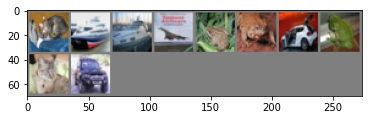

testlabels:   cat  ship  ship plane  frog  frog   car  frog   cat   car
predlabels:   cat  ship plane plane  deer  frog   car  frog   dog   car


In [10]:
#visualize the prediction result of trained CNN on some of test set images
import torchvision
import torchvision.transforms as transforms
testloader = torch.utils.data.DataLoader(testset, batch_size=10,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(testloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print("testlabels: " + ' '.join('%5s' % classes[labels[j]] for j in range(10)))
print("predlabels: " + ' '.join('%5s' % classes[y_pred[j]] for j in range(10)))



```
# This is formatted as code
```

 **Task 2 Starts Here**

Reference Links:

https://www.stefanfiott.com/machine-learning/cifar-10-classifier-using-cnn-in-pytorch/

https://zhenye-na.github.io/2018/09/28/pytorch-cnn-cifar10.html

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.datasets 
import torchvision.transforms as transforms

In [ ]:
transform = torchvision.transforms.Compose([transforms.ToTensor(),
transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))])                           # Normlize the data M=0 and Sd=1 (0.5) for garyscale images

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

trainset, valset = torch.utils.data.random_split(trainset, [45000, 5000]) 

trainloader = torch.utils.data.DataLoader(trainset, batch_size=50, shuffle=True)            # Traning Set# Note that batch_size is a hyperpapamter
valloader   = torch.utils.data.DataLoader(valset, batch_size=50, shuffle = True)            # Validation Set
testloader  = torch.utils.data.DataLoader(testset, batch_size=1000, shuffle=False)          # Test Set not need to iterate the data 

Files already downloaded and verified


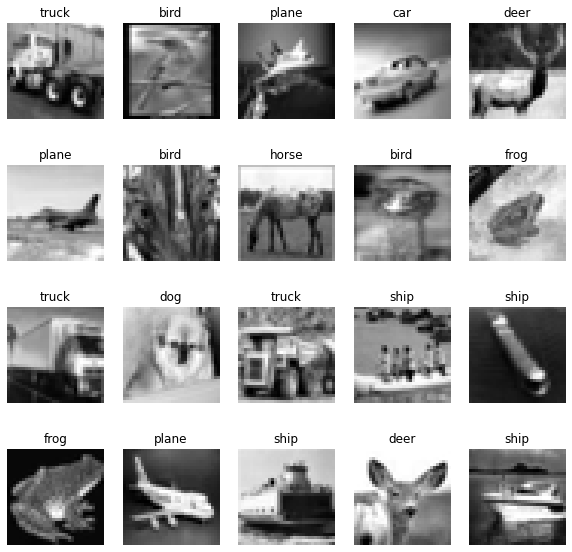

In [ ]:
labels_map = {0 : 'plane', 1 : 'car', 2 : 'bird', 3 : 'cat', 4 : 'deer', 5 : 'dog', 6 : 'frog',
              7 : 'horse', 8 : 'ship', 9 : 'truck'};

fig = plt.figure(figsize=(10,10));
columns = 5;
rows = 4;
for i in range(1, columns*rows +1):
    img_xy = np.random.randint(len(trainset));
    img = trainset[img_xy][0][0,:,:]
    fig.add_subplot(rows, columns, i)
    plt.title(labels_map[trainset[img_xy][1]])
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
# Model 1
# The model architecture consists of the following:
# Three convolutional layer with kernel size of 3x3,
# Pooling layer and normlization layer,
# Two fully connected layers,
# Using one dropout,
# Batch_size is 50 for training and validation set,
# Using the SDG optimizer, with learning rate 0.001
# Relu activation function.

In [ ]:
class Cifar10Model1(nn.Module):
  def __init__(self):
      super(Cifar10Model1, self).__init__()
                                                                                #input is 32x32 size of each image will use with padding of 1* for convolutional
      self.conv1 = nn.Conv2d(3, 16, 3, padding=1)                               # First Convoluational layer with step_size 3 and padding=1 
      self.conv2 = nn.Conv2d(16, 64, 3, padding=1)                              # Second Convoluational layer with step_size 3 and padding=1
      self.conv3 = nn.Conv2d(64, 128, 3, padding=1)                             # Third Convoluational layer with step_size 3 and padding=1
      self.pool = nn.MaxPool2d(2,2)
      self.fc1 = nn.Linear(128 * 4 * 4, 500)                                    # First Fully Connected layer, dimention 64
      self.fc2 = nn.Linear(500, 10)                                             # Second Fully Connected layer
      self.dropout = nn.Dropout(0.25)

        

  def forward(self, x):
      x = self.pool(F.relu(self.conv1(x)))                                      # First Max_Pooling of 2x2 layer with Relu activation function 
      x = self.pool(F.relu(self.conv2(x)))                                      # Second Max_Pooling of 2x2 layer with Relu activation function 
      x = self.pool(F.relu(self.conv3(x)))                                      # Third Max_Pooling of 2x2 layer with Relu activation function 
      
      # Flatten the image
      x = x.view(-1, 128*4*4)                                                   # Reshape before sending to fc layer
      x = F.relu(self.fc1(x))                                                   # relu Activation function for the first layer
      x = self.dropout(x)                                                       # Drop out p=0.25 can be use to improve the model performance
      x = self.fc2(x)                                                           # Last fully connect layer 
      return F.log_softmax(x)                                                   # Sofmax to Multiclassify the data


In [ ]:
import torch.optim as optim
model=Cifar10Model1()         # Define model
print(model)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)       # Use SDG Optimizer (Stochastic Gradient Descent) with learning rate 0.001

Cifar10Model1(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)


In [ ]:
# Train Baseline model i.e Model 1

In [ ]:
batch_size = 50                                                                 #Hyperparamter *            
model.cuda()                                                                    # send model to GPU for high compuation capacity 
model.train()                                                                   # to set train mode for drop out
train_loss, train_accu = [], []                                                 # to return training loss and training accuracy
i = 0
for epoch in range(20):
    for images, labels in trainloader:
        # send tensors to GPU
        images, labels = images.cuda(), labels.cuda()
        
        optimizer.zero_grad()                                                   # zero the parameter gradients
        outputs = model(images)                                                 # calls the forward function of model, i.e. model.forward(images)
        loss = F.nll_loss(outputs, labels)                                      # calculate loss []
        loss.backward()                                                         # calculate gradients
        train_loss.append(loss.item())
        optimizer.step()                                                        # update learnable parameters
        predictions = outputs.data.max(1)[1]                                    # column at idx 1 has actual prob.  
        
        # send tensors back to CPU because numpy ops don't support GPU.
        accuracy = np.sum(predictions.cpu().numpy()==labels.cpu().numpy())/batch_size*100             # predict and compare with ground truth
        train_accu.append(accuracy)
        if i % 1000 == 0:
            print('Train Step: {}\tLoss: {:.3f}\tAccuracy: {:.3f}'.format(i, loss.item(), accuracy))  # print the training accuracy for reach iteration 
        i += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Step: 0	Loss: 2.299	Accuracy: 12.000
Train Step: 1000	Loss: 2.173	Accuracy: 12.000
Train Step: 2000	Loss: 1.842	Accuracy: 34.000
Train Step: 3000	Loss: 1.592	Accuracy: 42.000
Train Step: 4000	Loss: 1.291	Accuracy: 58.000
Train Step: 5000	Loss: 1.063	Accuracy: 68.000
Train Step: 6000	Loss: 1.221	Accuracy: 56.000
Train Step: 7000	Loss: 1.100	Accuracy: 60.000
Train Step: 8000	Loss: 1.507	Accuracy: 56.000
Train Step: 9000	Loss: 0.918	Accuracy: 68.000
Train Step: 10000	Loss: 0.810	Accuracy: 68.000
Train Step: 11000	Loss: 0.875	Accuracy: 68.000
Train Step: 12000	Loss: 0.825	Accuracy: 66.000
Train Step: 13000	Loss: 0.782	Accuracy: 68.000
Train Step: 14000	Loss: 0.731	Accuracy: 78.000
Train Step: 15000	Loss: 0.662	Accuracy: 78.000
Train Step: 16000	Loss: 0.794	Accuracy: 70.000
Train Step: 17000	Loss: 0.842	Accuracy: 70.000


In [ ]:
# Validate Model 1

In [ ]:
model.eval()
correct = 0
for images, labels in valloader:                                                # use validation set to evaluate the model accuracy and performance   
    with torch.no_grad():                                                       # so that computation graph history is not stored
        images, labels = images.cuda(), labels.cuda()                           # send tensors to GPU
        outputs = model(images)
        predictions = outputs.data.max(1)[1]
        correct += predictions.eq(labels.data).sum()
        
print('Validation set accuracy: {:.2f}%'.format(100.0 * correct / len(valloader.dataset)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Validation set accuracy: 70.86%


In [ ]:
# Test Model 1

In [ ]:
model.eval()
correct = 0
for images, labels in testloader:                                               # use test set for final prediction and evaluate test accuracy    
    with torch.no_grad():                                                       # so that computation graph history is not stored
        images, labels = images.cuda(), labels.cuda()                           # send tensors to GPU
        outputs = model(images)
        predictions = outputs.data.max(1)[1]
        correct += predictions.eq(labels.data).sum()
        
print('Test set accuracy: {:.2f}%'.format(100.0 * correct / len(testloader.dataset)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Test set accuracy: 71.30%


Model 2:

Changes from last model are:

Four convolutional layer with padding = 2. 

No more drop out function used




In [ ]:
class Cifar10Model2(nn.Module):
  def __init__(self):
      super(Cifar10Model2, self).__init__()
                                                                                #input is 32x32 size of each image will use with padding of 2* for convolutional
      self.conv1 = nn.Conv2d(3, 32, 3, padding=2)                               # First Convoluational layer with step_size 3 and padding=2 
      self.conv2 = nn.Conv2d(32, 64, 3, padding=2)                              # Second Convoluational layer with step_size 3 and padding=2           
      self.conv3 = nn.Conv2d(64, 128, 3, padding=2)                             # Third Convoluational layer with step_size 3 and padding=2
      self.conv4 = nn.Conv2d(128, 128, 3, padding=2)                            # Fourth Convoluational layer with step_size 3 and padding=2 
      self.pool = nn.MaxPool2d(2,2)
      self.fc1 = nn.Linear(128*3*3, 1024)                                       # First Fully Connected layer, dimention 128
      self.fc2 = nn.Linear(1024, 10)                                            # Second Fully Connected layer
  def forward(self, x):
      x = self.pool(F.relu(self.conv1(x)))                                      # First Max_Pooling of 2x2 layer with Relu activation function
      x = self.pool(F.relu(self.conv2(x)))                                      # Second Max_Pooling of 2x2 layer with Relu activation function
      x = self.pool(F.relu(self.conv3(x)))                                      # Third Max_Pooling of 2x2 layer with Relu activation function
      x = self.pool(F.relu(self.conv4(x)))                                      # Fourth Max_Pooling of 2x2 layer with Relu activation function
      # Flatten the image
      x = x.view(-1, 128 * 3 * 3)                                               # Reshape before sending to fc layer
      x = F.relu(self.fc1(x))                                                   # relu Activation function for the first layer
      x = self.fc2(x)                                                           # Last fully connect layer 
      return F.log_softmax(x)                                                   # Sofmax to Multiclassify the data


In [ ]:
import torch.optim as optim
model_2=Cifar10Model2()         # Define model
print(model_2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_2.parameters(), lr=0.001, momentum=0.9)             # Use SDG Optimizer (Stochastic Gradient Descent) with learning rate 0.001

Cifar10Model2(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1152, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=10, bias=True)
)


In [ ]:
# Train Model 2

In [ ]:
batch_size = 50                                                                 #Hyperparamter *            
model_2.cuda()                                                                  # send model to GPU for high compuation capacity 
model_2.train()                                                                 # to set train mode for drop out
train_loss, train_accu = [], []                                                 # to return training loss and training accuracy
i = 0
for epoch in range(20):
    for images, labels in trainloader:
        # send tensors to GPU
        images, labels = images.cuda(), labels.cuda()
        
        optimizer.zero_grad()                                                   # zero the parameter gradients
        outputs = model_2(images)                                               # calls the forward function of model, i.e. model.forward(images)
        loss = F.nll_loss(outputs, labels)                                      # calculate loss []
        loss.backward()                                                         # calculate gradients
        train_loss.append(loss.item())
        optimizer.step()                                                        # update learnable parameters
        predictions = outputs.data.max(1)[1]                                    # column at idx 1 has actual prob.  
        
        # send tensors back to CPU because numpy ops don't support GPU.
        accuracy = np.sum(predictions.cpu().numpy()==labels.cpu().numpy())/batch_size*100             # predict and compare with ground truth
        train_accu.append(accuracy)
        if i % 1000 == 0:
            print('Train Step: {}\tLoss: {:.3f}\tAccuracy: {:.3f}'.format(i, loss.item(), accuracy))  # print the training accuracy for reach iteration 
        i += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Step: 0	Loss: 0.792	Accuracy: 76.000
Train Step: 1000	Loss: 0.557	Accuracy: 88.000
Train Step: 2000	Loss: 0.576	Accuracy: 78.000
Train Step: 3000	Loss: 0.601	Accuracy: 76.000
Train Step: 4000	Loss: 0.830	Accuracy: 74.000
Train Step: 5000	Loss: 0.649	Accuracy: 78.000
Train Step: 6000	Loss: 0.576	Accuracy: 84.000
Train Step: 7000	Loss: 0.666	Accuracy: 76.000
Train Step: 8000	Loss: 0.455	Accuracy: 80.000
Train Step: 9000	Loss: 0.614	Accuracy: 78.000
Train Step: 10000	Loss: 0.758	Accuracy: 74.000
Train Step: 11000	Loss: 0.535	Accuracy: 82.000
Train Step: 12000	Loss: 0.738	Accuracy: 74.000
Train Step: 13000	Loss: 0.603	Accuracy: 84.000
Train Step: 14000	Loss: 0.915	Accuracy: 70.000
Train Step: 15000	Loss: 0.606	Accuracy: 82.000
Train Step: 16000	Loss: 0.872	Accuracy: 72.000
Train Step: 17000	Loss: 0.679	Accuracy: 78.000


In [ ]:
# Validate Model 2

In [ ]:
model_2.eval()
correct = 0
for images, labels in valloader:                                                # use validation set to evaluate the model accuracy and performance   
    with torch.no_grad():                                                       # so that computation graph history is not stored
        images, labels = images.cuda(), labels.cuda()                           # send tensors to GPU
        outputs = model_2(images)
        predictions = outputs.data.max(1)[1]
        correct += predictions.eq(labels.data).sum()
        
print('Validation set accuracy: {:.2f}%'.format(100.0 * correct / len(valloader.dataset)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Validation set accuracy: 68.56%


In [ ]:
# Test Model 2

In [ ]:
model_2.eval()
correct = 0
for images, labels in testloader:                                               # use test set for final prediction and evaluate test accuracy    
    with torch.no_grad():                                                       # so that computation graph history is not stored
        images, labels = images.cuda(), labels.cuda()                           # send tensors to GPU
        outputs = model_2(images)
        predictions = outputs.data.max(1)[1]
        correct += predictions.eq(labels.data).sum()
        
print('Test set accuracy: {:.2f}%'.format(100.0 * correct / len(testloader.dataset)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Test set accuracy: 69.70%


In [ ]:
# Model 3 Starts here
# Used leaky Relu

Model 3:

Changes from last Model are:

Used leaky Relu as Activation Function

Used 2 drop outs of p=0.25


In [ ]:
class Cifar10Model3(nn.Module):
  def __init__(self):
      super(Cifar10Model3, self).__init__()
                                                                                #input is 32x32 size of each image will use with padding of 1* for convolutional  
      self.conv1 = nn.Conv2d(3, 16, 3, padding=1)                               # First Convoluational layer with step_size 3 and padding=1 
      self.conv2 = nn.Conv2d(16, 32, 3, padding=1)                              # Second Convoluational layer with step_size 3 and padding=1 
      self.conv3 = nn.Conv2d(32, 64, 3, padding=1)                              # Third Convoluational layer with step_size 3 and padding=1 
      self.pool = nn.MaxPool2d(2,2)
      self.fc1 = nn.Linear(64 * 4 * 4, 500)                                     # First Fully Connected layer, dimention 64
      self.fc2 = nn.Linear(500, 10)                                             # Second Fully Connected layer
      self.dropout = nn.Dropout(0.25)

        

  def forward(self, x):
      x = self.pool(F.leaky_relu(self.conv1(x)))                                # First Max_Pooling of 2x2 layer with Relu activation function
      x = self.pool(F.leaky_relu(self.conv2(x)))                                # Second Max_Pooling of 2x2 layer with Relu activation function      
      x = self.pool(F.leaky_relu(self.conv3(x)))                                # Third Max_Pooling of 2x2 layer with Relu activation function
      
      # Flatten the image
      x = x.view(-1, 64*4*4)                                                    # Reshape before sending to fc layer  
      x = self.dropout(x)                                                       # First Drop out p=0.25 can be use to improve the model performance
      x = F.leaky_relu(self.fc1(x))                                             # leaky relu as Activation function for the first layer
      x = self.dropout(x)                                                       # Second Drop out
      x = self.fc2(x)                                                           # Last fully connect layer 
      return F.log_softmax(x)                                                   # Sofmax to Multiclassify the data


In [ ]:
import torch.optim as optim
model_3=Cifar10Model3()         # Define model
print(model_3)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_3.parameters(), lr=0.001, momentum=0.9)             # Use SDG Optimizer (Stochastic Gradient Descent) with learning rate 0.001

Cifar10Model3(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)


In [ ]:
# Train Model 3

In [ ]:
batch_size = 50                                                                 #Hyperparamter *            
model_3.cuda()                                                                  # send model to GPU for high compuation capacity 
model_3.train()                                                                 # to set train mode for drop out
train_loss, train_accu = [], []                                                 # to return training loss and training accuracy
i = 0
for epoch in range(20):
    for images, labels in trainloader:
        # send tensors to GPU
        images, labels = images.cuda(), labels.cuda()
        
        optimizer.zero_grad()                                                   # zero the parameter gradients
        outputs = model_3(images)                                               # calls the forward function of model, i.e. model.forward(images)
        loss = F.nll_loss(outputs, labels)                                      # calculate loss []
        loss.backward()                                                         # calculate gradients
        train_loss.append(loss.item())
        optimizer.step()                                                        # update learnable parameters
        predictions = outputs.data.max(1)[1]                                    # column at idx 1 has actual prob.  
        
        # send tensors back to CPU because numpy ops don't support GPU.
        accuracy = np.sum(predictions.cpu().numpy()==labels.cpu().numpy())/batch_size*100             # predict and compare with ground truth
        train_accu.append(accuracy)
        if i % 1000 == 0:
            print('Train Step: {}\tLoss: {:.3f}\tAccuracy: {:.3f}'.format(i, loss.item(), accuracy))  # print the training accuracy for reach iteration 
        i += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Step: 0	Loss: 1.017	Accuracy: 62.000
Train Step: 1000	Loss: 0.992	Accuracy: 70.000
Train Step: 2000	Loss: 0.813	Accuracy: 74.000
Train Step: 3000	Loss: 0.795	Accuracy: 76.000
Train Step: 4000	Loss: 1.036	Accuracy: 60.000
Train Step: 5000	Loss: 0.550	Accuracy: 78.000
Train Step: 6000	Loss: 0.824	Accuracy: 66.000
Train Step: 7000	Loss: 0.728	Accuracy: 66.000
Train Step: 8000	Loss: 0.775	Accuracy: 74.000
Train Step: 9000	Loss: 0.856	Accuracy: 72.000
Train Step: 10000	Loss: 0.630	Accuracy: 76.000
Train Step: 11000	Loss: 0.545	Accuracy: 80.000
Train Step: 12000	Loss: 0.492	Accuracy: 80.000
Train Step: 13000	Loss: 0.619	Accuracy: 82.000
Train Step: 14000	Loss: 0.430	Accuracy: 84.000
Train Step: 15000	Loss: 0.685	Accuracy: 82.000
Train Step: 16000	Loss: 0.611	Accuracy: 76.000
Train Step: 17000	Loss: 0.500	Accuracy: 86.000


In [ ]:
# Validate Model 3

In [ ]:
model_3.eval()
correct = 0
for images, labels in valloader:                                                # use validation set to evaluate the model accuracy and performance   
    with torch.no_grad():                                                       # so that computation graph history is not stored
        images, labels = images.cuda(), labels.cuda()                           # send tensors to GPU
        outputs = model_3(images)
        predictions = outputs.data.max(1)[1]
        correct += predictions.eq(labels.data).sum()
        
print('Validation set accuracy: {:.2f}%'.format(100.0 * correct / len(valloader.dataset)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Validation set accuracy: 73.46%


In [ ]:
# Test Model 3

In [ ]:
model_3.eval()
correct = 0
for images, labels in testloader:                                               # use test set for final prediction and evaluate test accuracy    
    with torch.no_grad():                                                       # so that computation graph history is not stored
        images, labels = images.cuda(), labels.cuda()                           # send tensors to GPU
        outputs = model_3(images)
        predictions = outputs.data.max(1)[1]
        correct += predictions.eq(labels.data).sum()
        
print('Test set accuracy: {:.2f}%'.format(100.0 * correct / len(testloader.dataset)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Test set accuracy: 74.41%


In [ ]:
# Model 4 starts Here
# Added Adam optimizer

Model 4:

Changes from last model are:

Adam Optimizer is used

In [ ]:
class Cifar10Model4(nn.Module):
  def __init__(self):
      super(Cifar10Model4, self).__init__()
                                                                                #input is 32x32 size of each image will use with padding of 1* for convolutional
      self.conv1 = nn.Conv2d(3, 16, 3, padding=1)                               # First Convoluational layer with step_size 3 and padding=1 
      self.conv2 = nn.Conv2d(16, 32, 3, padding=1)                              # Second Convoluational layer with step_size 3 and padding=1 
      self.conv3 = nn.Conv2d(32, 64, 3, padding=1)                              # Third Convoluational layer with step_size 3 and padding=1 
      self.pool = nn.MaxPool2d(2,2)
      self.fc1 = nn.Linear(64 * 4 * 4, 500)                                     # First Fully Connected layer, dimention 64
      self.fc2 = nn.Linear(500, 10)                                             # Second Fully Connected layer
      self.dropout = nn.Dropout(0.25)

        

  def forward(self, x):
      x = self.pool(F.leaky_relu(self.conv1(x)))                                # First Max_Pooling of 2x2 layer with Relu activation function
      x = self.pool(F.leaky_relu(self.conv2(x)))                                # Second Max_Pooling of 2x2 layer with Relu activation function
      x = self.pool(F.leaky_relu(self.conv3(x)))                                # Third Max_Pooling of 2x2 layer with Relu activation function  
      
      # Flatten the image
      x = x.view(-1, 64*4*4)                                                    # Reshape before sending to fc layer
      x = self.dropout(x)                                                       # Drop out p=0.25 can be use to improve the model performance
      x = F.leaky_relu(self.fc1(x))                                             # relu Activation function for the first layer
      x = self.dropout(x)                                                       # Second Drop out
      x = self.fc2(x)                                                           # Last fully connect layer
      return F.log_softmax(x)                                                   # Sofmax to Multiclassify the data


In [ ]:
import torch.optim as optim
model_4=Cifar10Model4()                                                         # Define model
print(model_4)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_4.parameters(), lr=0.001)                          # Use SDG Optimizer (Stochastic Gradient Descent) with learning rate 0.001

Cifar10Model4(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)


In [ ]:
# Train Model 4

In [ ]:
batch_size = 50                                                                 #Hyperparamter *            
model_4.cuda()                                                                  # send model to GPU for high compuation capacity 
model_4.train()                                                                 # to set train mode for drop out
train_loss, train_accu = [], []                                                 # to return training loss and training accuracy
i = 0
for epoch in range(20):
    for images, labels in trainloader:
        # send tensors to GPU
        images, labels = images.cuda(), labels.cuda()
        
        optimizer.zero_grad()                                                   # zero the parameter gradients
        outputs = model_4(images)                                               # calls the forward function of model, i.e. model.forward(images)
        loss = F.nll_loss(outputs, labels)                                      # calculate loss []
        loss.backward()                                                         # calculate gradients
        train_loss.append(loss.item())
        optimizer.step()                                                        # update learnable parameters
        predictions = outputs.data.max(1)[1]                                    # column at idx 1 has actual prob.  
        
        # send tensors back to CPU because numpy ops don't support GPU.
        accuracy = np.sum(predictions.cpu().numpy()==labels.cpu().numpy())/batch_size*100             # predict and compare with ground truth
        train_accu.append(accuracy)
        if i % 1000 == 0:
            print('Train Step: {}\tLoss: {:.3f}\tAccuracy: {:.3f}'.format(i, loss.item(), accuracy))  # print the training accuracy for reach iteration 
        i += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Step: 0	Loss: 2.312	Accuracy: 6.000
Train Step: 1000	Loss: 1.341	Accuracy: 52.000
Train Step: 2000	Loss: 0.948	Accuracy: 74.000
Train Step: 3000	Loss: 0.640	Accuracy: 78.000
Train Step: 4000	Loss: 0.801	Accuracy: 68.000
Train Step: 5000	Loss: 0.936	Accuracy: 70.000
Train Step: 6000	Loss: 0.619	Accuracy: 76.000
Train Step: 7000	Loss: 0.710	Accuracy: 72.000
Train Step: 8000	Loss: 0.553	Accuracy: 82.000
Train Step: 9000	Loss: 0.395	Accuracy: 88.000
Train Step: 10000	Loss: 0.336	Accuracy: 80.000
Train Step: 11000	Loss: 0.309	Accuracy: 84.000
Train Step: 12000	Loss: 0.419	Accuracy: 84.000
Train Step: 13000	Loss: 0.312	Accuracy: 90.000
Train Step: 14000	Loss: 0.265	Accuracy: 88.000
Train Step: 15000	Loss: 0.514	Accuracy: 86.000
Train Step: 16000	Loss: 0.483	Accuracy: 84.000
Train Step: 17000	Loss: 0.214	Accuracy: 92.000


In [ ]:
# Validate Model 4

In [ ]:
model_4.eval()
correct = 0
for images, labels in valloader:                                                # use validation set to evaluate the model accuracy and performance   
    with torch.no_grad():                                                       # so that computation graph history is not stored
        images, labels = images.cuda(), labels.cuda()                           # send tensors to GPU
        outputs = model_4(images)
        predictions = outputs.data.max(1)[1]
        correct += predictions.eq(labels.data).sum()
        
print('Validation set accuracy: {:.2f}%'.format(100.0 * correct / len(valloader.dataset)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Validation set accuracy: 75.96%


In [ ]:
# Test Model 4

In [ ]:
model_4.eval()
correct = 0
for images, labels in testloader:                                               # use test set for final prediction and evaluate test accuracy    
    with torch.no_grad():                                                       # so that computation graph history is not stored
        images, labels = images.cuda(), labels.cuda()                           # send tensors to GPU
        outputs = model_4(images)
        predictions = outputs.data.max(1)[1]
        correct += predictions.eq(labels.data).sum()
        
print('Test set accuracy: {:.2f}%'.format(100.0 * correct / len(testloader.dataset)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Test set accuracy: 76.42%


In [ ]:
# Model 5 begins here
# Increase the value of dropout function to 0.10

Model 5:

Changes from last model are:

Increased drop out function to p=0.60

SDG Optimizer is used


In [ ]:
class Cifar10Model5(nn.Module):
  def __init__(self):
      super(Cifar10Model5, self).__init__()
                                                                                #input is 32x32 size of each image will use with padding of 1* for convolutional
      self.conv1 = nn.Conv2d(3, 16, 3, padding=1)                               # First Convoluational layer with step_size 3 and padding=1 
      self.conv2 = nn.Conv2d(16, 32, 3, padding=1)                              # Second Convoluational layer with step_size 3 and padding=1 
      self.conv3 = nn.Conv2d(32, 64, 3, padding=1)                              # Third Convoluational layer with step_size 3 and padding=1 
      self.pool = nn.MaxPool2d(2,2)
      self.fc1 = nn.Linear(64 * 4 * 4, 500)                                     # First Fully Connected layer, dimention 64
      self.fc2 = nn.Linear(500, 10)                                             # Second Fully Connected layer
      self.dropout = nn.Dropout(0.60)

        

  def forward(self, x):
      x = self.pool(F.relu(self.conv1(x)))                                      # First Max_Pooling of 2x2 layer with Relu activation function
      x = self.pool(F.relu(self.conv2(x)))                                      # Second Max_Pooling of 2x2 layer with Relu activation function    
      x = self.pool(F.relu(self.conv3(x)))                                      # Third Max_Pooling of 2x2 layer with Relu activation function      
      
      # Flatten the image
      x = x.view(-1, 64*4*4)                                                    # Reshape before sending to fc layer
      x = self.dropout(x)                                                       # Drop out p=0.25 can be use to improve the model performance
      x = F.relu(self.fc1(x))                                                   # relu Activation function for the first layer  
      x = self.dropout(x)                                                       # Second Drop out      
      x = self.fc2(x)                                                           # Last fully connect layer   
      return F.log_softmax(x)                                                   # Sofmax to Multiclassify the data


In [ ]:
import torch.optim as optim
model_5=Cifar10Model5()                                                         # Define model
print(model_5)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_5.parameters(), lr=0.001, momentum=0.9)             # Use SDG Optimizer (Stochastic Gradient Descent) with learning rate 0.001

Cifar10Model5(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
  (dropout): Dropout(p=0.6, inplace=False)
)


In [ ]:
# Train Model 5

In [ ]:
batch_size = 50                                                                 #Hyperparamter *            
model_5.cuda()                                                                  # send model to GPU for high compuation capacity 
model_5.train()                                                                 # to set train mode for drop out
train_loss, train_accu = [], []                                                 # to return training loss and training accuracy
i = 0
for epoch in range(20):
    for images, labels in trainloader:
        # send tensors to GPU
        images, labels = images.cuda(), labels.cuda()
        
        optimizer.zero_grad()                                                   # zero the parameter gradients
        outputs = model_5(images)                                               # calls the forward function of model, i.e. model.forward(images)
        loss = F.nll_loss(outputs, labels)                                      # calculate loss []
        loss.backward()                                                         # calculate gradients
        train_loss.append(loss.item())
        optimizer.step()                                                        # update learnable parameters
        predictions = outputs.data.max(1)[1]                                    # column at idx 1 has actual prob.  
        
        # send tensors back to CPU because numpy ops don't support GPU.
        accuracy = np.sum(predictions.cpu().numpy()==labels.cpu().numpy())/batch_size*100             # predict and compare with ground truth
        train_accu.append(accuracy)
        if i % 1000 == 0:
            print('Train Step: {}\tLoss: {:.3f}\tAccuracy: {:.3f}'.format(i, loss.item(), accuracy))  # print the training accuracy for reach iteration 
        i += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Step: 0	Loss: 1.066	Accuracy: 54.000
Train Step: 1000	Loss: 0.820	Accuracy: 74.000
Train Step: 2000	Loss: 0.848	Accuracy: 64.000
Train Step: 3000	Loss: 0.904	Accuracy: 66.000
Train Step: 4000	Loss: 0.847	Accuracy: 68.000
Train Step: 5000	Loss: 0.843	Accuracy: 68.000
Train Step: 6000	Loss: 0.818	Accuracy: 74.000
Train Step: 7000	Loss: 1.249	Accuracy: 54.000
Train Step: 8000	Loss: 1.101	Accuracy: 62.000
Train Step: 9000	Loss: 0.877	Accuracy: 72.000
Train Step: 10000	Loss: 0.790	Accuracy: 70.000
Train Step: 11000	Loss: 0.871	Accuracy: 72.000
Train Step: 12000	Loss: 0.907	Accuracy: 70.000
Train Step: 13000	Loss: 0.801	Accuracy: 70.000
Train Step: 14000	Loss: 0.936	Accuracy: 72.000
Train Step: 15000	Loss: 0.767	Accuracy: 72.000
Train Step: 16000	Loss: 0.897	Accuracy: 66.000
Train Step: 17000	Loss: 0.865	Accuracy: 70.000


In [ ]:
# Validate Model 5

In [ ]:
model_5.eval()
correct = 0
for images, labels in valloader:                                                # use validation set to evaluate the model accuracy and performance   
    with torch.no_grad():                                                       # so that computation graph history is not stored
        images, labels = images.cuda(), labels.cuda()                           # send tensors to GPU
        outputs = model_5(images)
        predictions = outputs.data.max(1)[1]
        correct += predictions.eq(labels.data).sum()
        
print('Validation set accuracy: {:.2f}%'.format(100.0 * correct / len(valloader.dataset)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Validation set accuracy: 73.80%


In [ ]:
# Test Model 5

In [ ]:
model_5.eval()
correct = 0
for images, labels in testloader:                                               # use test set for final prediction and evaluate test accuracy    
    with torch.no_grad():                                                       # so that computation graph history is not stored
        images, labels = images.cuda(), labels.cuda()                           # send tensors to GPU
        outputs = model_5(images)
        predictions = outputs.data.max(1)[1]
        correct += predictions.eq(labels.data).sum()
        
print('Test set accuracy: {:.2f}%'.format(100.0 * correct / len(testloader.dataset)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Test set accuracy: 74.04%


**Summary**

**Model 1**

This model's  architecture consists of the following:
1) Three convolutional layer with kernel size of 3x3 and padding 1,
2) Pooling layer and normlization layer,
3) Two fully connected layers,
4) Using one dropout p=0.25,
5) Batch_size is 50 for training and validation set,
6) Using the SDG optimizer, with learning rate 0.001
7) Relu activation function.
we have obtained*** train_set_accuracy of 70.86% and test_set_accuracy of 71.30%***

***Model 2 ***

This model's  architecture consists of the following:
1) Four convolutional layer with kernel size of 3x3 and padding 2,
2) Pooling layer and normlization layer,
3) Two fully connected layers,
4) No dropout function
5) Batch_size is 50 for training and validation set,
6) Using the SDG optimizer, with learning rate 0.001
7) Relu activation function.
We have obtained** train_set_accuracy of 68.56% and test_set_accuracy of 69.70%.**

Model 3

This model's  architecture consists of the following:
1) Three convolutional layer with kernel size of 3x3 and padding 1,
2) Pooling layer and normlization layer,
3) Two fully connected layers,
4) two dropout functions of p=0.25
5) Batch_size is 50 for training and validation set,
6) Using the SDG optimizer, with learning rate 0.001
7) Leaky Relu activation function.
We have obtained** train_set_accuracy of 73.46% and test_set_accuracy of 74.41%.**

Model 4

This model's  architecture consists of the following:
1) Three convolutional layer with kernel size of 3x3 and padding 1,
2) Pooling layer and normlization layer,
3) Two fully connected layers,
4) two dropout functions of p=0.25
5) Batch_size is 50 for training and validation set,
6) Using the Adam optimizer, with learning rate 0.001
7) Leaky Relu activation function.
We have obtained** train_set_accuracy of 75.96% and test_set_accuracy of 76.42%.**

Model 5

This model's  architecture consists of the following:
1) Three convolutional layer with kernel size of 3x3 and padding 1,
2) Pooling layer and normlization layer,
3) Two fully connected layers,
4) two dropout functions of p=0.60
5) Batch_size is 50 for training and validation set,
6) Using the SGD optimizer, with learning rate 0.001
7) Relu activation function.
We have obtained** train_set_accuracy of 73.80% and test_set_accuracy of 74.04%.**

From the above we have observed the best model was model (4) of using Leaky_Relu activation function insted of Relu function with Adam optimizer it imporves both train accuracy and test accuracy. On the other hand the worst model performance among all is model (2), using the SGD optimiter with no dropout function.Using Leaky_Relu instead of Relu activation function also improves the performace of the model greatly. Also, value of the dropout function plays important role on the model performace.
